## Import relevant Python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Import data

In [2]:
# import Lower Granite data
lower_granite_outflow = pd.read_csv('lowergraniteoutflow.csv')
lower_granite_storage = pd.read_csv('lowergranitestorage.csv')
lower_granite_data = lower_granite_outflow.merge(lower_granite_storage, how='inner', on=['date'])
lower_granite_data['date'] = pd.to_datetime(lower_granite_data['date'])

# import Little Goose data
little_goose_outflow = pd.read_csv('littlegooseoutflow.csv')
little_goose_storage = pd.read_csv('littlegoosestorage.csv')
little_goose_data = little_goose_outflow.merge(little_goose_storage, how='inner', on=['date'])
little_goose_data['date'] = pd.to_datetime(little_goose_data['date'])

# import Lower Monumental data
lower_monumental_outflow = pd.read_csv('lowermonumentaloutflow.csv')
lower_monumental_storage = pd.read_csv('lowermonumentalstorage.csv')
lower_monumental_data = lower_monumental_outflow.merge(lower_monumental_storage, how='inner', on=['date'])
lower_monumental_data['date'] = pd.to_datetime(lower_monumental_data['date'])

# import Ice Harbor data
ice_harbor_outflow = pd.read_csv('iceharboroutflow.csv')
ice_harbor_storage = pd.read_csv('iceharborstorage.csv')
ice_harbor_data = ice_harbor_outflow.merge(ice_harbor_storage, how='inner', on=['date'])
ice_harbor_data['date'] = pd.to_datetime(ice_harbor_data['date'])

display(lower_granite_data)

,date,H (unit:cfs),S (unit:cfs)
0,1928-07-01,63918,0
1,1928-07-02,57164,0
2,1928-07-03,52531,0
3,1928-07-04,49500,0
4,1928-07-05,47309,0
...,...,...,...
32959,2018-09-26,23090,-1363
32960,2018-09-27,19443,1275
32961,2018-09-28,22972,-2374
32962,2018-09-29,17289,2989


<Axes: xlabel='date', ylabel='H (unit:cfs)'>

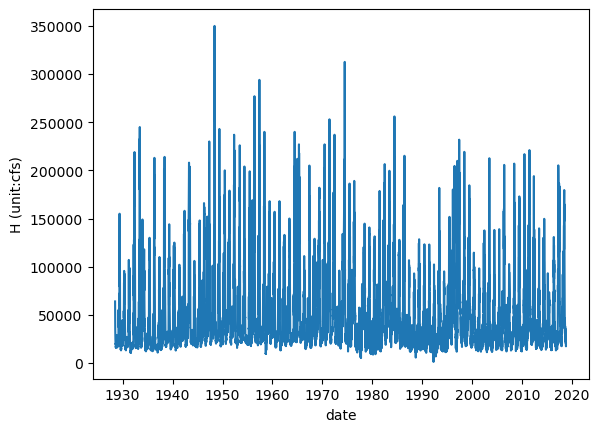

In [3]:
#plot lower granite outflow
sns.lineplot(x='date', y='H (unit:cfs)', data=lower_granite_data)

<Axes: xlabel='date', ylabel='H (unit:cfs)'>

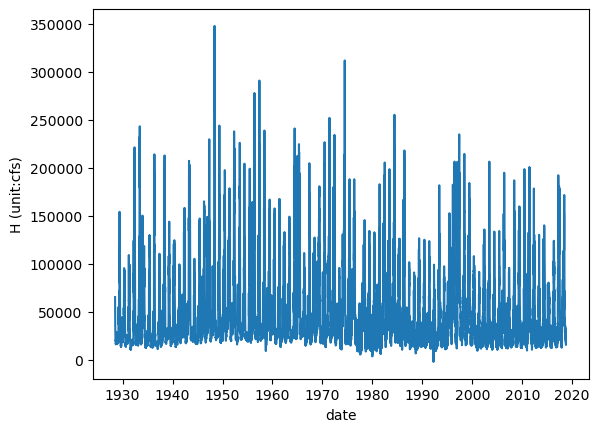

In [4]:
#plot little goose outflow
sns.lineplot(x='date', y='H (unit:cfs)', data=little_goose_data)

Text(0.5, 1.0, 'min streamflow')

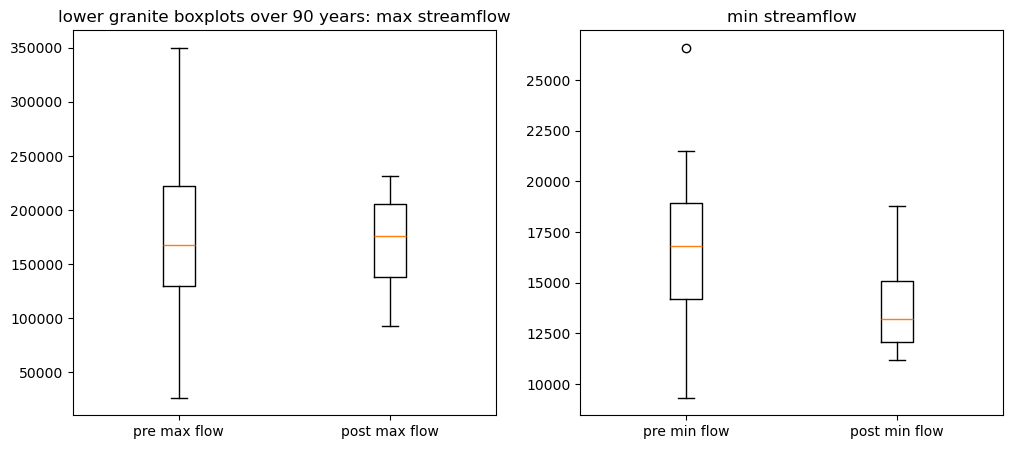

In [5]:
pre_cutoff = datetime(1970,1,1)
lower_granite_pre = lower_granite_data[lower_granite_data['date'] <= pre_cutoff]
lower_granite_pre_max = lower_granite_pre.groupby(lower_granite_pre['date'].dt.year)['H (unit:cfs)'].max()
lower_granite_pre_min = lower_granite_pre.groupby(lower_granite_pre['date'].dt.year)['H (unit:cfs)'].min()

post_cutoff = datetime(1993,1,1)
lower_granite_post = lower_granite_data[lower_granite_data['date'] >= post_cutoff]
lower_granite_post_max = lower_granite_post.groupby(lower_granite_post['date'].dt.year)['H (unit:cfs)'].max()
lower_granite_post_min = lower_granite_post.groupby(lower_granite_post['date'].dt.year)['H (unit:cfs)'].min()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.boxplot([lower_granite_pre_max, lower_granite_post_max], tick_labels=['pre max flow', 'post max flow'])
plt.title('lower granite boxplots over 90 years: max streamflow')

plt.subplot(1,2,2)
plt.boxplot([lower_granite_pre_min, lower_granite_post_min], tick_labels=['pre min flow', 'post min flow'])
plt.title('min streamflow')

## Initialize reservoirs

In [6]:
from newReservoir import Reservoir

ice_harbor = Reservoir(SA=9200*4047,num_turb=6,capacity=603000,tail_elev=339,pool_elev=446,bottom_elev=310,fish_pass=0.965, area=550_000_000, pc=106_000)
lower_monumental = Reservoir(SA=6590*4047,num_turb=6,capacity=810000,tail_elev=439,pool_elev=548.3,bottom_elev=406,fish_pass=0.965, area=1_610_000_000, pc=130_000)
little_goose = Reservoir(SA=10025*4047,num_turb=6,capacity=903000,tail_elev=539,pool_elev=646.5,bottom_elev=500,fish_pass=0.9775, area=1_175_000_000, pc=130_000)
lower_granite = Reservoir(SA=8900*4047,num_turb=6,capacity=810000,tail_elev=636,pool_elev=746.5,bottom_elev=590,fish_pass=1, area=2_477_000_000, pc=130_000)


## Simulate reservoirs

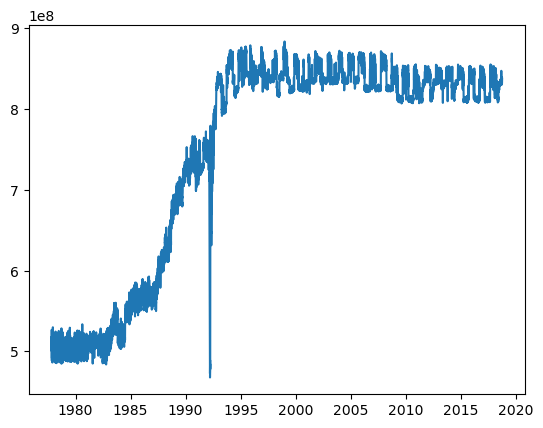

In [7]:
lower_granite_storage = lower_granite.simulate_storage(0, 1, lower_granite_data['S (unit:cfs)'], lower_granite_data['H (unit:cfs)'])

plt.plot(lower_granite_data['date'][18000:], lower_granite_storage[18000:])

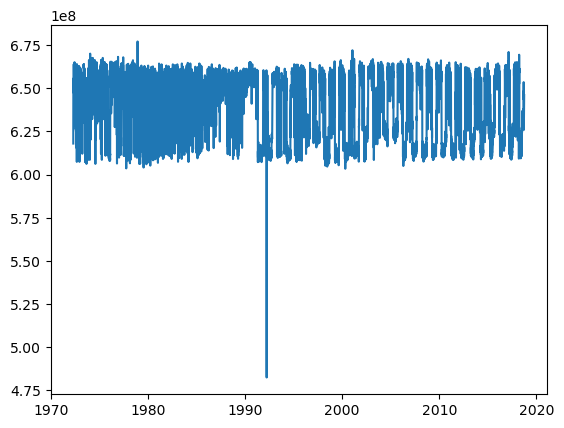

In [8]:
little_goose_storage = little_goose.simulate_storage(0, 1, little_goose_data['S (unit:cfs)'], little_goose_data['H (unit:cfs)'])

plt.plot(little_goose_data['date'][16000:], little_goose_storage[16000:])

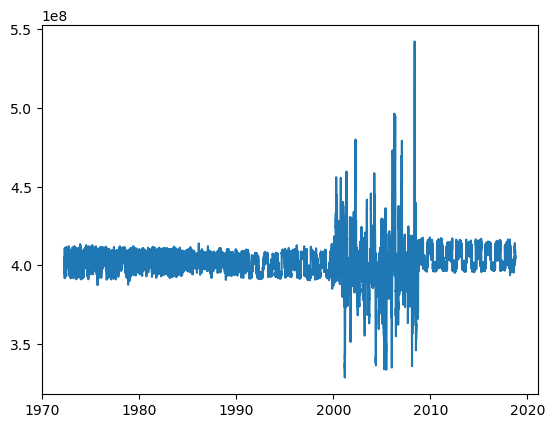

In [9]:
lower_monumental_storage = lower_monumental.simulate_storage(0, 1, lower_monumental_data['S (unit:cfs)'], lower_monumental_data['H (unit:cfs)'])

plt.plot(lower_monumental_data['date'][16000:], lower_monumental_storage[16000:])

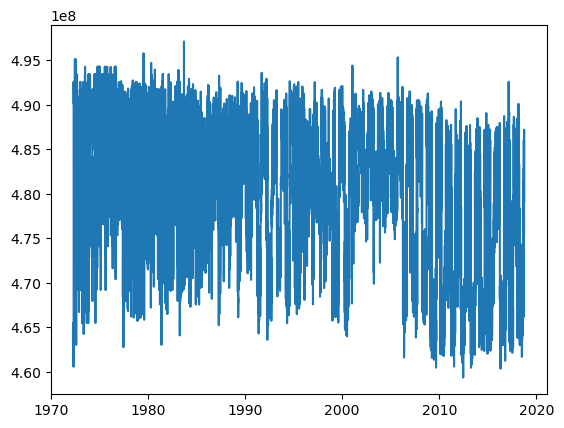

In [10]:
ice_harbor_storage = ice_harbor.simulate_storage(0, 1, ice_harbor_data['S (unit:cfs)'], ice_harbor_data['H (unit:cfs)'])

plt.plot(ice_harbor_data['date'][16000:], ice_harbor_storage[16000:])

### Test Reservoirs

In [11]:
LG_sim = lower_granite.simulate(1, 0,lower_granite_data['date'], lower_granite_data['H (unit:cfs)'], lower_granite_data['S (unit:cfs)'])
display(LG_sim)

LGo_sim = little_goose.simulate(1, 0,little_goose_data['date'], little_goose_data['H (unit:cfs)'], little_goose_data['S (unit:cfs)'])
display(LGo_sim)

LM_sim = lower_monumental.simulate(1, 0,lower_monumental_data['date'], lower_monumental_data['H (unit:cfs)'], lower_monumental_data['S (unit:cfs)'])
display(LM_sim)

IH_sim = ice_harbor.simulate(1, 0,ice_harbor_data['date'], ice_harbor_data['H (unit:cfs)'], ice_harbor_data['S (unit:cfs)'])
display(IH_sim)


(np.float64(1374552672.0250661), 1)

(np.float64(1134628965.5692558), 0.9775)

(np.float64(1540747753.012452), 0.965)

(np.float64(1378572596.2093801), 0.965)

### Simulate All Possible Combinations

In [12]:
#create a list of all possible dam removal combinations/scenarios
import itertools
elements = [0,1]
combos = list(itertools.product(elements, repeat=4))
# example [0,0,0,0]
hydro_sums = np.zeros(16)
fish_result = np.ones(16)
res_list = [lower_granite,little_goose, lower_monumental, ice_harbor] #list of initialized reservoirs above
res_data_list = [lower_granite_data,little_goose_data, lower_monumental_data, ice_harbor_data] #list of initialized reservoir data above
for i, combo in enumerate(combos):
    for k in range(len(res_list)):
        hydro, fish = (res_list[k].simulate(combo[k], 0, res_data_list[k]['date'], res_data_list[k]['H (unit:cfs)'], res_data_list[k]['S (unit:cfs)']))
        hydro_sums[i] += hydro
        fish_result[i] *= fish
        # elif combo[k] == 0:
        #     res_list[k].simulate(combo[k], res_data_list[k]['date'], res_data_list[k]['H (unit:cfs)'], 0
    # display(combo)
    # display(hydro_sums[i])
    # display(fish_result[i])

results = pd.DataFrame({'Sim': combos,'Avg hydro': hydro_sums,'Fish Pass': fish_result})
results = results.set_index('Sim')
display(results)

,Avg hydro,Fish Pass
Sim,,
"(0, 0, 0, 0)",0.000000e+00,1.000000
"(0, 0, 0, 1)",1.378573e+09,0.965000
"(0, 0, 1, 0)",1.540748e+09,0.965000
"(0, 0, 1, 1)",2.919320e+09,0.931225
"(0, 1, 0, 0)",1.134629e+09,0.977500
"(0, 1, 0, 1)",2.513202e+09,0.943288
"(0, 1, 1, 0)",2.675377e+09,0.943288
"(0, 1, 1, 1)",4.053949e+09,0.910272
"(1, 0, 0, 0)",1.374553e+09,1.000000


### Rank in order of High to Low (Fish and Hydro)

In [13]:
display(results.sort_values(by = 'Avg hydro', ascending=False))
display(results.sort_values(by = 'Fish Pass',ascending=False))

,Avg hydro,Fish Pass
Sim,,
"(1, 1, 1, 1)",5.428502e+09,0.910272
"(1, 0, 1, 1)",4.293873e+09,0.931225
"(0, 1, 1, 1)",4.053949e+09,0.910272
"(1, 1, 1, 0)",4.049929e+09,0.943288
"(1, 1, 0, 1)",3.887754e+09,0.943288
"(0, 0, 1, 1)",2.919320e+09,0.931225
"(1, 0, 1, 0)",2.915300e+09,0.965000
"(1, 0, 0, 1)",2.753125e+09,0.965000
"(0, 1, 1, 0)",2.675377e+09,0.943288


,Avg hydro,Fish Pass
Sim,,
"(0, 0, 0, 0)",0.000000e+00,1.000000
"(1, 0, 0, 0)",1.374553e+09,1.000000
"(1, 1, 0, 0)",2.509182e+09,0.977500
"(0, 1, 0, 0)",1.134629e+09,0.977500
"(1, 0, 0, 1)",2.753125e+09,0.965000
"(1, 0, 1, 0)",2.915300e+09,0.965000
"(0, 0, 1, 0)",1.540748e+09,0.965000
"(0, 0, 0, 1)",1.378573e+09,0.965000
"(1, 1, 1, 0)",4.049929e+09,0.943288
